# Functions

In [1]:
include("C:/Users/mjbarillas/Documents/GitHub/Mimosa/scripts/MB Ex/kPCA/TB/ex2_aa_kPCA_TB_ST4SL4.jl")

Voltage_Optimization2 (generic function with 1 method)

In [2]:
cd("C:/Users/mjbarillas/Documents/GitHub/Mimosa/")

In [231]:
include("C:/Users/mjbarillas/Documents/GitHub/Mimosa/scripts/MB Ex/TB ST4 SL4/ex0_stat_EM_TubeBeam_St&Sl.jl")

run (generic function with 1 method)

# Collect Data

In [4]:
pot = 5000.0
St, Sl = 4, 4
conf = [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]
x_i  = ReadData_i(St,Sl,conf,pot)

87-element Vector{Float64}:
  0.0
  0.003599583989462805
  0.007185900788045346
  0.010745339041941167
  0.014264498398929971
  0.01773014839583303
  0.021129254451756938
  0.02445040201799727
  0.027724149267721595
  0.030981648332320238
  ⋮
 -0.024143878509569325
 -0.025107074549491352
 -0.025918471752784136
 -0.026608884218224573
 -0.027180452861723076
 -0.027631004373251056
 -0.027958837908507866
 -0.02816275030672469
 -0.02824281035807838

In [8]:
gr()

Plots.GRBackend()

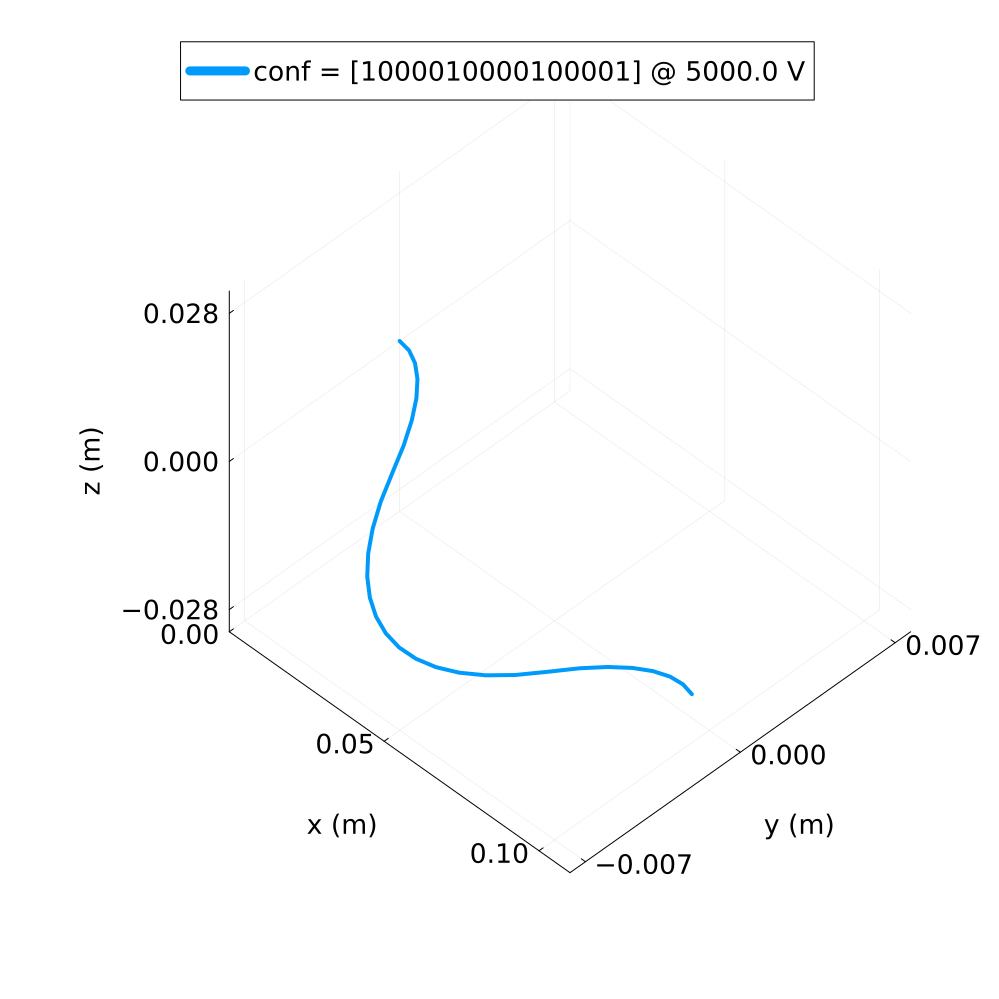

In [9]:
n = length(x_i)
conf_string = "["
for i in conf
    conf_string = conf_string * "$i"
end
x_ = x_i[[1:Int(n/3)...]]
y_ = x_i[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i[[(Int(n/3)*2)+1:n...]]
conf_string = conf_string * "]"
plot(x_,y_,z_, 
    xlims =(0.0,0.11),
    size=(1000,1000),
    xlabel ="x (m)",
    ylabel = "y (m)",
    zlabel = "z (m)",
    linewidth=4,
    label="conf = $(conf_string) @ $pot V",
    legendfontsize=18,
    guidefontsize=18,
    tickfontsize=18,
    legend=:topleft,
    camera = (45, 45),
    xticks = [0.0,0.05,0.1],
    yticks = [-round(maximum(abs.(y_)),digits=3),0.0,round(maximum(abs.(y_)),digits=3)],
    zticks = [-round(maximum(abs.(z_)),digits=3),0.0,round(maximum(abs.(z_)),digits=3)],
    ylims = (-1.1*round(maximum(abs.(y_)),digits=3),1.1*round(maximum(abs.(y_)),digits=3)),
    zlims = (-1.15*round(maximum(abs.(z_)),digits=3),1.15*round(maximum(abs.(z_)),digits=3)),
    )

In [10]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST4SL_FOS_10000100_5kV.svg")

"G:\\My Drive\\Temp\\Comunication\\ROM_Paper\\TB4ST4SL_FOS_10000100_5kV.svg"

In [11]:
St, Sl, pot_list, N_rand = 4, 4, [5000], 200
conf_list, X = ReadData(St,Sl,pot_list,N_rand)

([0 1 … 0 1; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 1 0], [0.0 0.0 … 0.0 0.0; 0.003571428571430387 0.003599583992382229 … 0.0035995839865282614 0.003631334138149885; … ; -3.049318610115481e-20 -0.025023916350559644 … 0.03137838629882813 0.013757098424891907; -3.105787473265768e-20 -0.026087228788452727 … 0.03355656085819472 0.013758706435503686])

In [104]:
k=3
β = 0.0001 # 4.515461700136166e-7
Κ(X1,X2) = exp(-β*(dot(X1-X2,X1-X2)))
Λ, U, U_, Ḡ, G = kPOD(Κ, X, k)
Z_ = real.(U_'*Ḡ)

3×264 Matrix{Float64}:
 8.12932e-5    0.000502879   0.00156074   …  -0.00160946   -0.000598616
 4.42427e-6    0.00147126   -0.000420535      0.000474112  -6.89774e-5
 0.000219239  -0.000109421  -4.77416e-5      -0.000216645   0.000151673

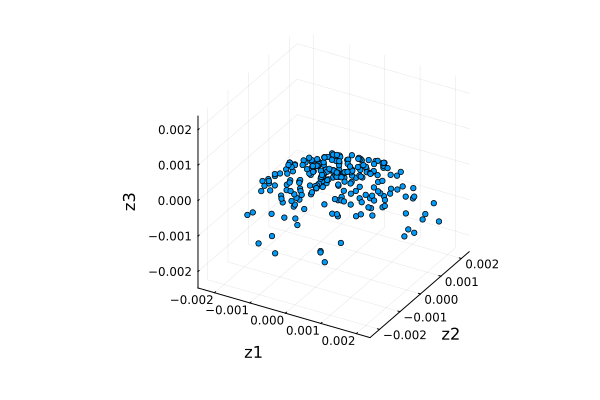

In [105]:
scatter(
    eachrow(Z_)...,xlabel="z1",ylabel="z2",zlabel="z3",
    # color=[group_pot(i,N,4) for i in 1:N],
    label=false, xlims=(minimum(Z_),maximum(Z_)),
    ylims=(minimum(Z_),maximum(Z_)),
    zlims=(minimum(Z_),maximum(Z_)),
    # hover=[i for i in 1:N],
    markersize=3
)

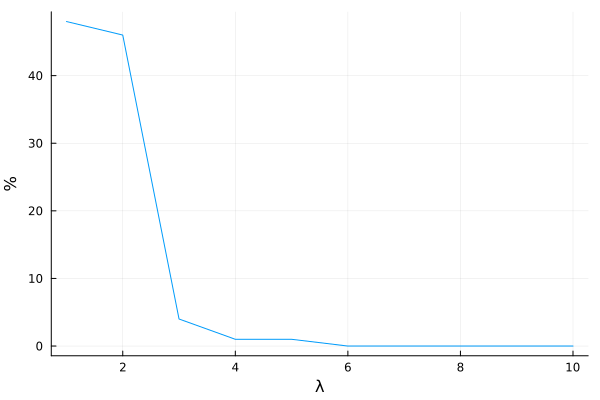

In [106]:
plot_eigen(Λ)

In [107]:
neighbors = 25
Y_, D_G_sym = isomap1(neighbors,Z_)

100.0 %                         


([8.913990248026478e-5 0.0007944611336808492 … -0.001547377531763241 -0.0006180078739310742; 1.7893828393133386e-5 -0.0013950302912544494 … -0.0007757939141504841 -4.531112236917697e-5], [0.0 0.001561513589476299 … 0.0018133778354824258 0.0007173293337619454; 0.001561513589476299 0.0 … 0.0024013245664365945 0.001983982709949283; … ; 0.0018133778354824258 0.0024013245664365945 … 0.0 0.001210429841751596; 0.0007173293337619454 0.001983982709949283 … 0.001210429841751596 0.0])

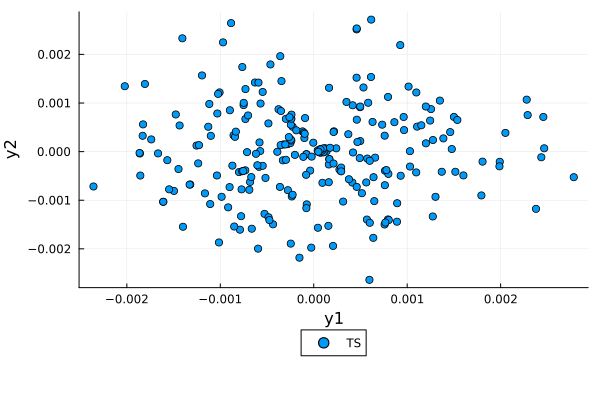

In [108]:
s = scatter(eachrow(Y_)...,xlabel="y1",ylabel="y2",label="TS",legend=:outerbottom,
    # legend_columns=2,
    # color=[group_pot(i,N,4) for i in 1:N]
    )

In [20]:
VS_Conf_list = [1:64...];

In [101]:
function Objective(β)
    k=3
    Κ(X1,X2) = exp(-β*(dot(X1-X2,X1-X2)))
    Λ, U, U_, Ḡ, G = kPOD(Κ, X, k)
    Z_ = real.(U_'*Ḡ)
    neighbors = 25
    Y_, D_G_sym = isomap1(neighbors,Z_)
    Y_gen = []
    for conf in eachcol(conf_list)
        y_gen = VectorSearch(Y_,conf,VS_Conf_list)
        push!(Y_gen,y_gen)
    end
    Y_gen = reduce(hcat,Y_gen)
    Err = norm(Y_gen-Y_)/norm(Y_)
    println("β = $(round(β,digits=4)) --- Err = $(round(Err,digits = 4))")
    return Err
end

Objective (generic function with 1 method)

In [102]:
β_min = optimize(Objective, 0.0, 20.0, GoldenSection(),f_tol=1.0e-6,iterations=50)

100.0 %                         
β = 7.6393 --- Err = 0.0636
100.0 %                         
β = 12.3607 --- Err = 0.0841
100.0 %                         
β = 4.7214 --- Err = 0.0522
100.0 %                         
β = 2.918 --- Err = 0.0456
100.0 %                         
β = 1.8034 --- Err = 0.0418
100.0 %                         
β = 1.1146 --- Err = 0.0395
100.0 %                         
β = 0.6888 --- Err = 0.0381
100.0 %                         
β = 0.4257 --- Err = 0.0374
100.0 %                         
β = 0.2631 --- Err = 0.0369
100.0 %                         
β = 0.1626 --- Err = 0.0366
100.0 %                         
β = 0.1005 --- Err = 0.0365
100.0 %                         
β = 0.0621 --- Err = 0.0363
100.0 %                         
β = 0.0384 --- Err = 0.0363
100.0 %                         
β = 0.0237 --- Err = 0.0362
100.0 %                         
β = 0.0147 --- Err = 0.0362
100.0 %                         
β = 0.0091 --- Err = 0.0362
100.0 %                 

Results of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [0.000000, 20.000000]
 * Minimizer: 3.705148e-07
 * Minimum: 3.615832e-02
 * Iterations: 50
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): false
 * Objective Function Calls: 51

In [100]:
β_min.minimizer

0.0008171269801689491

In [31]:
conf_list_test = CSV.File("data/csv/EM_TB_St4_Sl4_Phi2000_Random/EM_TB_ST4_SL4_ConfRand.csv") |> Tables.matrix
conf_list_test = conf_list_test[:,[1000-29:1000...]]

16×30 Matrix{Int64}:
 1  0  1  0  0  1  0  1  0  1  1  1  0  …  1  0  0  0  0  0  1  1  0  0  1  0
 0  0  1  0  0  1  1  1  1  0  0  1  0     1  0  1  1  1  0  1  0  0  0  1  1
 0  0  1  1  0  1  1  1  1  1  0  1  1     0  0  1  1  1  1  1  0  1  1  1  1
 0  0  1  0  1  1  0  0  1  1  0  0  0     0  0  0  1  0  1  1  0  1  0  0  1
 1  1  1  1  1  1  0  0  1  0  0  1  1     1  0  1  1  1  1  0  1  1  0  1  1
 0  1  0  1  0  0  0  1  1  1  0  1  1  …  1  1  1  1  0  0  1  0  0  1  1  1
 1  1  1  1  1  1  0  1  1  1  1  0  1     0  0  1  0  1  1  0  1  1  1  0  1
 1  0  0  0  0  0  1  1  1  0  1  0  0     0  0  1  1  0  1  1  0  1  1  1  1
 0  0  0  1  1  1  1  0  1  0  0  0  0     0  0  1  1  0  1  0  1  0  0  0  1
 1  0  1  1  0  0  0  0  1  0  0  1  0     0  1  1  0  0  1  1  1  0  1  0  0
 0  0  0  0  0  1  1  1  1  1  1  0  1  …  0  1  1  0  0  0  0  0  0  0  1  0
 0  1  1  0  0  0  1  0  0  1  1  1  1     0  1  1  1  0  0  0  0  0  1  1  0
 0  0  1  0  0  0  0  1  1  0  1  0  1     

In [162]:
X_test = []
for n_test in 1:30 
    conf = conf_list_test[:,n_test]
    x_test = ReadData_i(St,Sl,conf,pot_list[n_test_pot])
    push!(X_test,x_test)
end
X_test = reduce(hcat,X_test)

87×30 Matrix{Float64}:
  0.0          0.0           0.0          …   0.0          0.0
  0.00359958   0.00357143    0.00365848       0.00364445   0.00364445
  0.0071859    0.00714286    0.00731765       0.00728646   0.00728646
  0.0107453    0.0107143     0.0109769        0.0109225    0.0109225
  0.0142645    0.0142857     0.014636         0.0145497    0.0145497
  0.0177301    0.0178571     0.0182952    …   0.0181649    0.0181649
  0.0211292    0.0214287     0.0219544        0.0217652    0.0217652
  0.0244552    0.025007      0.0256135        0.0253494    0.0253495
  0.0277776    0.0286517     0.0292481        0.0289246    0.0289371
  0.0310982    0.0322933     0.0328799        0.0324961    0.032525
  ⋮                                       ⋱               
 -0.0151638   -0.00217921   -2.89726e-10     -0.00912914   0.00564849
 -0.0166734   -0.00169183    2.49821e-7      -0.00868594   0.00515448
 -0.0182258   -0.00112657   -0.00010761   …  -0.00813539   0.00450831
 -0.0197067   -0.000559

In [161]:
X_test[2]

87-element Vector{Float64}:
  0.0
  0.003571428559062653
  0.00714285707704605
  0.010714285398264758
  0.014285712847585778
  0.017857138079149324
  0.021428656306271138
  0.025007016752204302
  0.02865169948672436
  0.03229331289081335
  ⋮
 -0.0021792126087384644
 -0.0016918269991962386
 -0.0011265732764642476
 -0.0005595705651815837
  5.235509404093806e-6
  0.0005656932225988029
  0.0011196127798234234
  0.0016648423524435888
  0.0021994146894993623

In [183]:
nh = 1
n_test = 2
n_test_pot = 1
conf = conf_list_test[:,n_test]
x_test = ReadData_i(St,Sl,conf,pot_list[n_test_pot])
y_gen = VectorSearch(Y_,conf,pot_list[n_test_pot],pot_list,VS_Conf_list)

2-element Vector{Float64}:
 0.00014173948660469837
 8.334008891958594e-5

In [184]:
y_gen = VectorSearch(Y_,conf,VS_Conf_list)

2-element Vector{Float64}:
 0.00014173948660469837
 8.334008891958594e-5

In [148]:
pot_list[n_test_pot]

5000

In [149]:
pot_list

1-element Vector{Int64}:
 5000

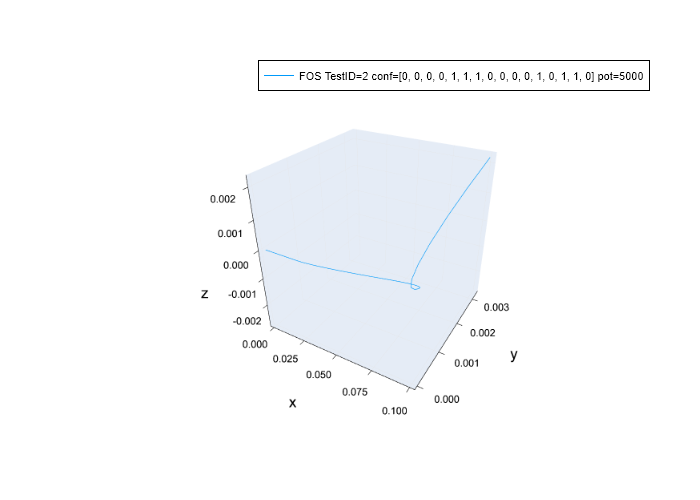

In [181]:
plot_x(x_test,"FOS TestID=$n_test conf=$conf pot=$(pot_list[n_test_pot])")


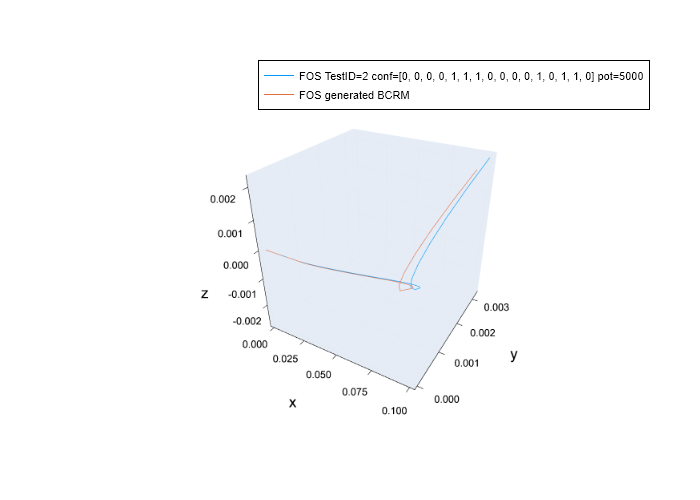

In [182]:
x_gen = ReverseMap2(y_gen,conf,Y_,X,conf_list,nh)
p = plot_x!(x_gen,"FOS generated BCRM")

In [174]:
norm(x_gen[[Int(n/3)+1:n...]]-x_test[[Int(n/3)+1:n...]])/norm(x_test[[Int(n/3)+1:n...]])

0.11497846100184715

In [170]:
nh = 1
Err = []
for n_test in 1:30
    x_test = X_test[:,n_test]
    conf = conf_list_test[:,n_test]
    y_gen = VectorSearch(Y_,conf,VS_Conf_list)
    t = nothing
    x_gen = ReverseMap2(y_gen,conf,Y_,X,conf_list,nh)
    push!(Err,norm(x_gen[[Int(n/3)+1:n...]]-x_test[[Int(n/3)+1:n...]])/norm(x_test[[Int(n/3)+1:n...]]))
end
Err_avg = sum(Err)/30

0.09049377640151761

In [249]:
nh = 1
Err = []
for n_test in 1:30
    x_test = X_test[:,n_test]
    conf = conf_list_test[:,n_test]
    y_gen = VectorSearch(Y_,conf,VS_Conf_list)
    t = nothing
    x_gen = ReverseMap2(y_gen,conf,Y_,X,conf_list,nh)
    push!(Err,norm(x_gen-x_test)/norm(x_test))
end
Err_avg = sum(Err)/30

0.021883823203159035

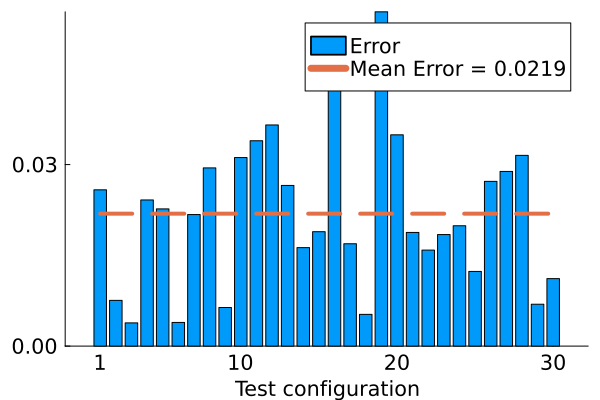

In [250]:
bar(Err,label="Error")
Err_avg = sum(Err)/30
plot!(collect(1:30),[Err_avg for _ in 1:30],
linestyle=:dash, linewidth=4, label="Mean Error = $(round(Err_avg,digits=4))",
grid = false, gridlinewidth = 2,
    tickfontsize = 14,
    guidefontsize=14,
    legendfontsize=14,
    yticks=[0.0,round(round(maximum(Err),digits=2)/2,digits=2),round(maximum(Err),digits=2)],
    xticks=[1,10,20,30],
    xlabel="Test configuration"
)

In [208]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST4SL_5kV_Surrogate_Error.svg")

"G:\\My Drive\\Temp\\Comunication\\ROM_Paper\\TB4ST4SL_5kV_Surrogate_Error.svg"

3


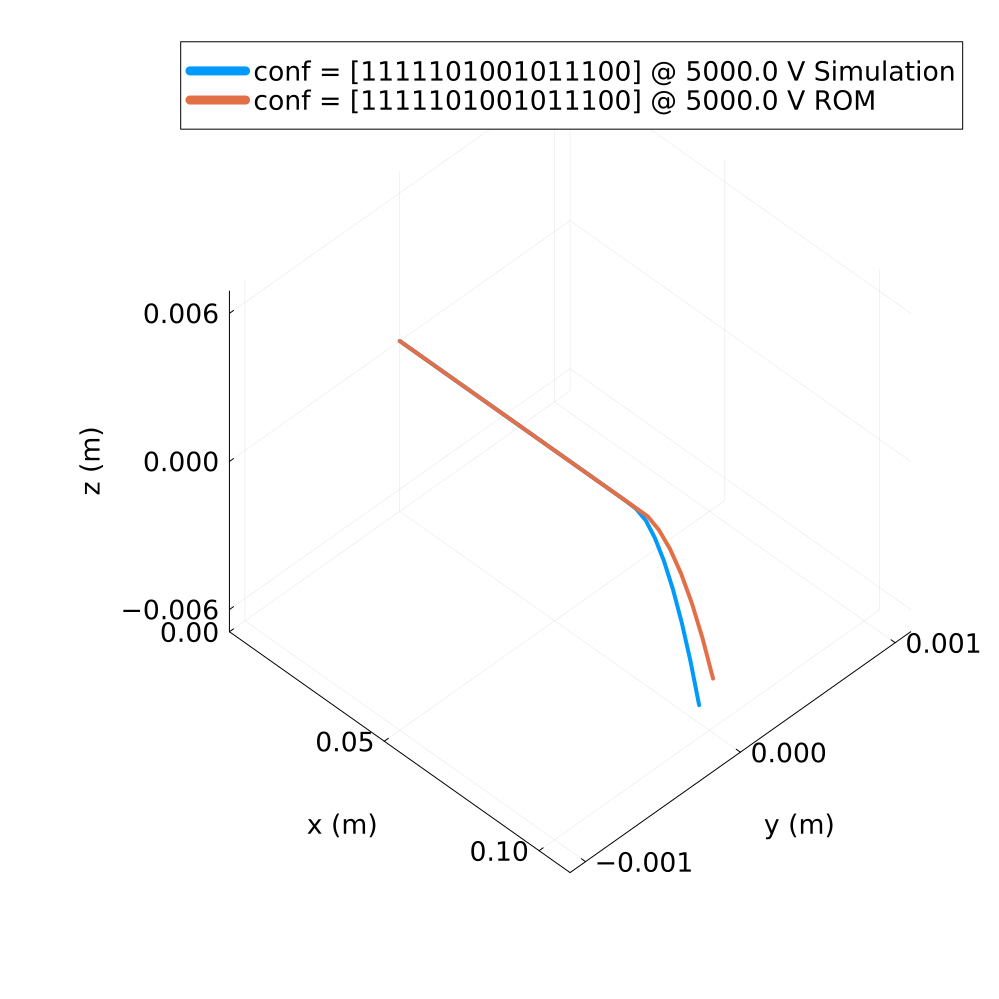

In [251]:
println(argmin(Err))
x_i_ = X_test[:,argmin(Err)]
n = length(x_i)
c_test_string = "["
for i in conf_list_test[:,argmin(Err)]
    c_test_string = c_test_string * "$i"
end
c_test_string = c_test_string * "]"
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V Simulation",
legendfontsize=18,
guidefontsize=18,
tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-round(maximum(abs.(y_)),digits=3),0.0,round(maximum(abs.(y_)),digits=3)],
zticks = [-round(maximum(abs.(z_)),digits=3),0.0,round(maximum(abs.(z_)),digits=3)],
ylims = (-1.1*round(maximum(abs.(y_)),digits=3),1.1*round(maximum(abs.(y_)),digits=3)),
zlims = (-1.15*round(maximum(abs.(z_)),digits=3),1.15*round(maximum(abs.(z_)),digits=3)),
)
y_gen = VectorSearch(Y_,conf_list_test[:,argmin(Err)],VS_Conf_list)
x_i_ = ReverseMap2(y_gen,conf_list_test[:,argmin(Err)],Y_,X,conf_list,nh)
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot!(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V ROM",
legendfontsize=18,
guidefontsize=18,
tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-round(maximum(abs.(y_))+0.001,digits=3),0.0,round(maximum(abs.(y_))+0.001,digits=3)],
zticks = [-round(maximum(abs.(z_))+0.001,digits=3),0.0,round(maximum(abs.(z_))+0.001,digits=3)],
ylims = (-1.1*round(maximum(abs.(y_))+0.001,digits=3),1.1*round(maximum(abs.(y_))+0.001,digits=3)),
zlims = (-1.15*round(maximum(abs.(z_))+0.001,digits=3),1.15*round(maximum(abs.(z_))+0.001,digits=3)),
)

In [203]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST4SL_5kV_Surrogate_Error_min_$(argmin(Err)).svg")

"G:\\My Drive\\Temp\\Comunication\\ROM_Paper\\TB4ST4SL_5kV_Surrogate_Error_min_3.svg"

In [66]:
nh=3

3

In [130]:
plotlyjs()

Plots.PlotlyJSBackend()

In [187]:
gr()

Plots.GRBackend()

In [247]:
println(argmax(Err))
x_i_ = X_test[:,argmax(Err)]
n = length(x_i)
c_test_string = "["
for i in conf_list_test[:,argmax(Err)]
    c_test_string = c_test_string * "$i"
end
c_test_string = c_test_string * "]"
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V",
legendfontsize=18,
guidefontsize=18,
tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-round(maximum(abs.(y_))+0.001,digits=3),0.0,round(maximum(abs.(y_))+0.001,digits=3)],
zticks = [-round(maximum(abs.(z_))+0.001,digits=3),0.0,round(maximum(abs.(z_))+0.001,digits=3)],
ylims = (-1.1*round(maximum(abs.(y_))+0.001,digits=3),1.1*round(maximum(abs.(y_))+0.001,digits=3)),
zlims = (-1.15*round(maximum(abs.(z_))+0.001,digits=3),1.15*round(maximum(abs.(z_))+0.001,digits=3)),
)


55


BoundsError: BoundsError: attempt to access 87×30 Matrix{Float64} at index [1:87, 55]

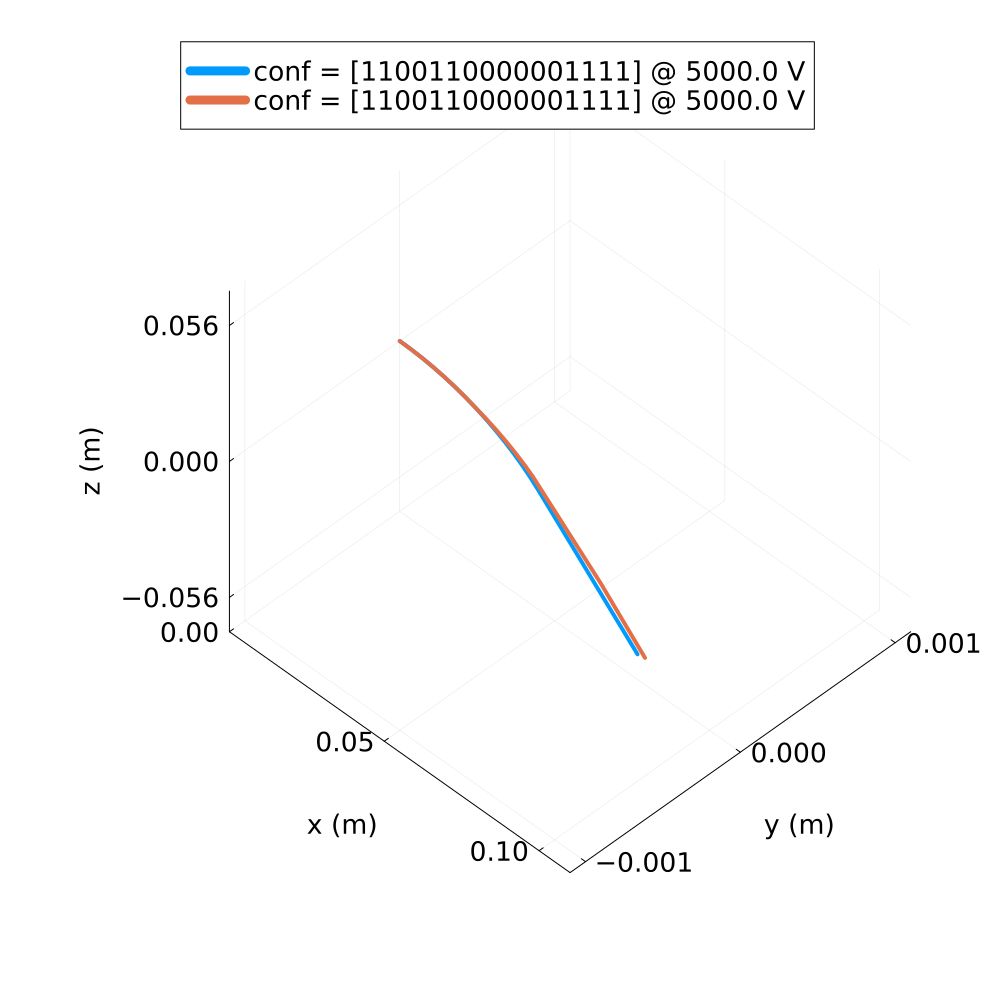

In [205]:
y_gen = VectorSearch(Y_,conf_list_test[:,argmax(Err)],VS_Conf_list)
x_i_ = ReverseMap2(y_gen,conf_list_test[:,argmax(Err)],Y_,X,conf_list,nh)
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot!(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V",
legendfontsize=18,
guidefontsize=18,
tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-round(maximum(abs.(y_))+0.001,digits=3),0.0,round(maximum(abs.(y_))+0.001,digits=3)],
zticks = [-round(maximum(abs.(z_))+0.001,digits=3),0.0,round(maximum(abs.(z_))+0.001,digits=3)],
# ylims = (-1.1*round(maximum(abs.(y_)),digits=3),1.1*round(maximum(abs.(y_)),digits=3)),
# zlims = (-1.15*round(maximum(abs.(z_)),digits=3),1.15*round(maximum(abs.(z_)),digits=3)),
)

In [206]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST4SL_5kV_Surrogate_Error_max_$(argmax(Err)).svg")

"G:\\My Drive\\Temp\\Comunication\\ROM_Paper\\TB4ST4SL_5kV_Surrogate_Error_max_19.svg"

In [126]:
println(argmax(Err))
x_i_ = X_test[:,argmax(Err)]
n = length(x_i)
c_test_string = ""
for i in conf_list_test[:,argmax(Err)]
    c_test_string = c_test_string * "_$i"
end
c_test_string

2


"_0_0_0_0_1_1_1_0_0_0_0_1_0_1_1_0"

In [128]:
print(conf_list_test[:,argmax(Err)])

[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]

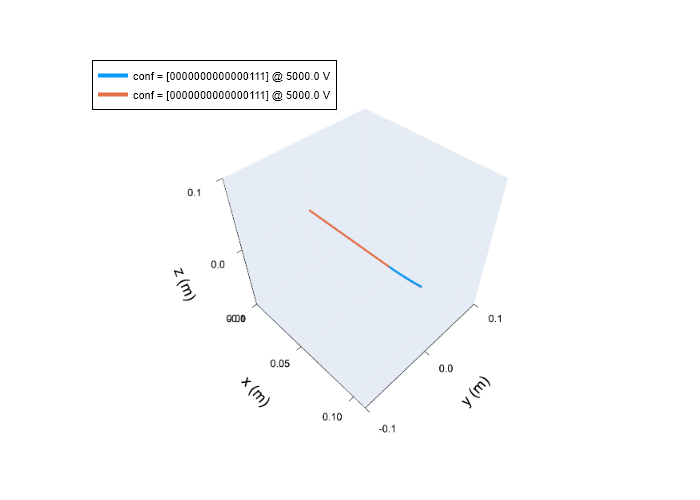

In [139]:
n_ = 64-1
x_i_ = X[:,n_]
n = length(x_i)
c_test_string = "["
for i in conf_list[:,n_]
    c_test_string = c_test_string * "$i"
end
c_test_string = c_test_string * "]"
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V",
# legendfontsize=18,
# guidefontsize=18,
# tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-0.1,0,0.1],
zticks = [-0.1,0,0.1],
ylims = (-0.1,0.1),
zlims = (-0.1,0.1),
)
y_gen = VectorSearch(Y_,conf_list[:,n_],VS_Conf_list)
x_i_ = ReverseMap2(y_gen,conf_list[:,n_],Y_,X,conf_list,nh)
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot!(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V",
# legendfontsize=18,
# guidefontsize=18,
# tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-0.1,0,0.1],
zticks = [-0.1,0,0.1],
ylims = (-0.1,0.1),
zlims = (-0.1,0.1),
)

In [133]:
x_i_

87-element Vector{Any}:
  0.0
  0.003571428571430387
  0.0071428571428584385
  0.010714285714286417
  0.014285714285714934
  0.017857142857143318
  0.021428571428571425
  0.025000000000000005
  0.02857142857142871
  0.032142857142856786
  ⋮
 -2.037961271093716e-18
 -2.296306320006214e-18
 -2.5546513689185785e-18
 -2.8454660141422723e-18
 -3.136280659366664e-18
 -3.4270953045908915e-18
 -3.7179099498152336e-18
 -4.008724595038927e-18
 -4.300103928894211e-18

In [210]:
conf_complete = []
for i1 in 0:1, i2 in 0:1, i3 in 0:1, i4 in 0:1, i5 in 0:1, i6 in 0:1, i7 in 0:1, i8 in 0:1, i9 in 0:1, i10 in 0:1, i11 in 0:1, i12 in 0:1, i13 in 0:1, i14 in 0:1, i15 in 0:1, i16 in 0:1
    push!(conf_complete,[i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16])
end
conf_complete = reduce(hcat,conf_complete)
Y_complete = []
for j in 1:1
    for i in 1:lastindex(eachcol(conf_complete))
        conf = conf_complete[:,i]
        push!(Y_complete,VectorSearch(Y_,conf,VS_Conf_list))
    end
end
Y_Complete = reduce(hcat,Y_complete)

2×65536 Matrix{Float64}:
 8.91399e-5   5.37294e-5  7.62671e-5  4.26937e-5  …  0.000116649  8.54219e-5
 1.78938e-5  -1.01419e-7  5.56547e-5  2.62435e-5     3.31935e-5   1.86943e-5

In [211]:
n_test = 5
x_test = X_test[:,n_test]
c_test = conf_list_test[:,n_test]
y_new = NewData2(x_test,Κ,neighbors,G,Z_,D_G_sym,Y_)

2-element Vector{Float64}:
 -0.0011710689551625477
 -0.00095944058368114

In [215]:
kdtree = KDTree(Y_Complete; leafsize = 10)
idxs, dists = knn(kdtree, y_new, 100, true)
conf_test_i = conf_complete[:,idxs[1]]
c_test == conf_test_i
println(c_test')
println(conf_test_i')

[0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0]
[1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1]


In [230]:
nh = 1
Err = []
for idx in idxs
    y_gen = VectorSearch(Y_,conf_complete[:,idx],VS_Conf_list)
    x_gen = ReverseMap2(y_gen,conf_complete[:,idx],Y_,X,conf_list,nh)
    # push!(Err,norm(x_gen[[Int(n/3)+1:n...]]-x_test[[Int(n/3)+1:n...]])/norm(x_test[[Int(n/3)+1:n...]]))
    push!(Err,Κ(x_test,x_gen))
end
id = argmin(Err)
conf_test_i = conf_complete[:,idxs[id]]
c_test == conf_test_i
println(c_test')
println(conf_test_i')
println(id)

[0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0]
[1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0]
81


In [232]:
main(; get_parameters(5000.0, conf_test_i, 4, 4,CenterLine_)...)

__________________________________________________________________________________________
|                                                                                         
|                                 MULTISIMO LAB                                           
|                                                                                          
|            Executing MIMOSA Driver for ElectroMechanics Problem                                    
|                                                                                         
|            Problem name TubeBeam_ϕ5000.0_St4_St4_1_0_0_1_0_1_1_1_0_0_1_1_0_0_1_0                                                          
|                                                                                         
|                                                                                         
|            pname    | TubeBeam_ϕ5000.0_St4_St4_1_0_0_1_0_1_1_1_0_0_1_1_0_0_1_0
|            ptype    | ElectroMechani

(MultiFieldFEFunction(), NLSolversCache())

In [233]:
x_i_test  = ReadData_i(St,Sl,conf_test_i,pot)

87-element Vector{Float64}:
 0.0
 0.003621252411749679
 0.007228786007055955
 0.01080826200481381
 0.014345691582766868
 0.017827272315730013
 0.02123942238013835
 0.02457355378750938
 0.02789837686044186
 0.03125108179447065
 ⋮
 0.008611532681344907
 0.01047912376770141
 0.012498129216634792
 0.014640812592943852
 0.016897672327816426
 0.01926027092504619
 0.021719731302700676
 0.02426679348149008
 0.02689142961669408

In [234]:
norm(x_gen[[Int(n/3)+1:n...]]-x_test[[Int(n/3)+1:n...]])/norm(x_test[[Int(n/3)+1:n...]])

0.06666416885044799

In [382]:
kdtree = KDTree(Y_Complete; leafsize = 10)
nh = 1
Err_ = []
for n_test in 1:30
    println("n_test = $n_test")
    x_test = X_test[:,n_test]
    c_test = conf_list_test[:,n_test]
    y_new = NewData2(x_test,Κ,neighbors,G,Z_,D_G_sym,Y_)
    idxs, dists = knn(kdtree, y_new, 100, true)
    conf_test_i = conf_complete[:,idxs[1]]
    Err = []
    for idx in idxs
        y_gen = VectorSearch(Y_,conf_complete[:,idx],VS_Conf_list)
        x_gen = ReverseMap2(y_gen,conf_complete[:,idx],Y_,X,conf_list,nh)
        # push!(Err,norm(x_gen[[Int(n/3)+1:n...]]-x_test[[Int(n/3)+1:n...]])/norm(x_test[[Int(n/3)+1:n...]]))
        push!(Err,norm(x_gen-x_test)/norm(x_test))
    end
    id = argmin(Err)
    conf_test_L = conf_complete[:,idxs[id]]
    println("Is the candidate correct: $(c_test == conf_test_L)")
    println("C_test : $c_test")
    println("Candidate configuration : $conf_test_L")
    println("Neighbor Number: $id")
    x_test_L  = ReadData_i(St,Sl,conf_test_L,pot)
    push!(Err_,norm(x_test_L-x_test)/norm(x_test))
end



n_test = 1
Is the candidate correct: false
C_test : [1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1]
Candidate configuration : [1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
Neighbor Number: 52
n_test = 2
Is the candidate correct: true
C_test : [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
Candidate configuration : [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
Neighbor Number: 77
n_test = 3
Is the candidate correct: false
C_test : [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]
Candidate configuration : [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]
Neighbor Number: 26
n_test = 4
Is the candidate correct: false
C_test : [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]
Candidate configuration : [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0]
Neighbor Number: 10
n_test = 5
Is the candidate correct: false
C_test : [0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
Candidate configuration : [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
Neighbor Number: 55
n_test = 6
Is the can

Excessive output truncated after 524340 bytes.


Is the candidate correct: true


In [422]:
gr()

Plots.GRBackend()

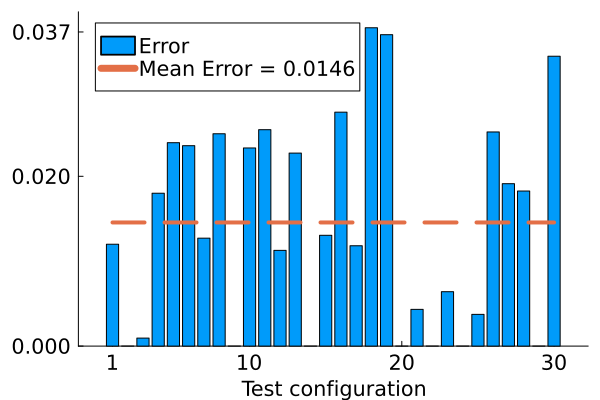

In [423]:
bar(Err_,label="Error")
Err_avg = sum(Err_)/30
plot!(collect(1:30),[Err_avg for _ in 1:30],
linestyle=:dash, linewidth=4, label="Mean Error = $(round(Err_avg,digits=4))",
grid = false, gridlinewidth = 2,
    tickfontsize = 14,
    guidefontsize=14,
    legendfontsize=14,
    yticks=[0.0,round(round(maximum(Err_),digits=3)/2,digits=2),round(maximum(Err_),digits=3)],
    xticks=[1,10,20,30],
    ylims=(0.0,1.05*round(maximum(Err_),digits=4)),
    xlabel="Test configuration"
)

In [424]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST4SL_5kV_Inverse_Error.svg")

"G:\\My Drive\\Temp\\Comunication\\ROM_Paper\\TB4ST4SL_5kV_Inverse_Error.svg"

In [392]:
gr()

Plots.GRBackend()

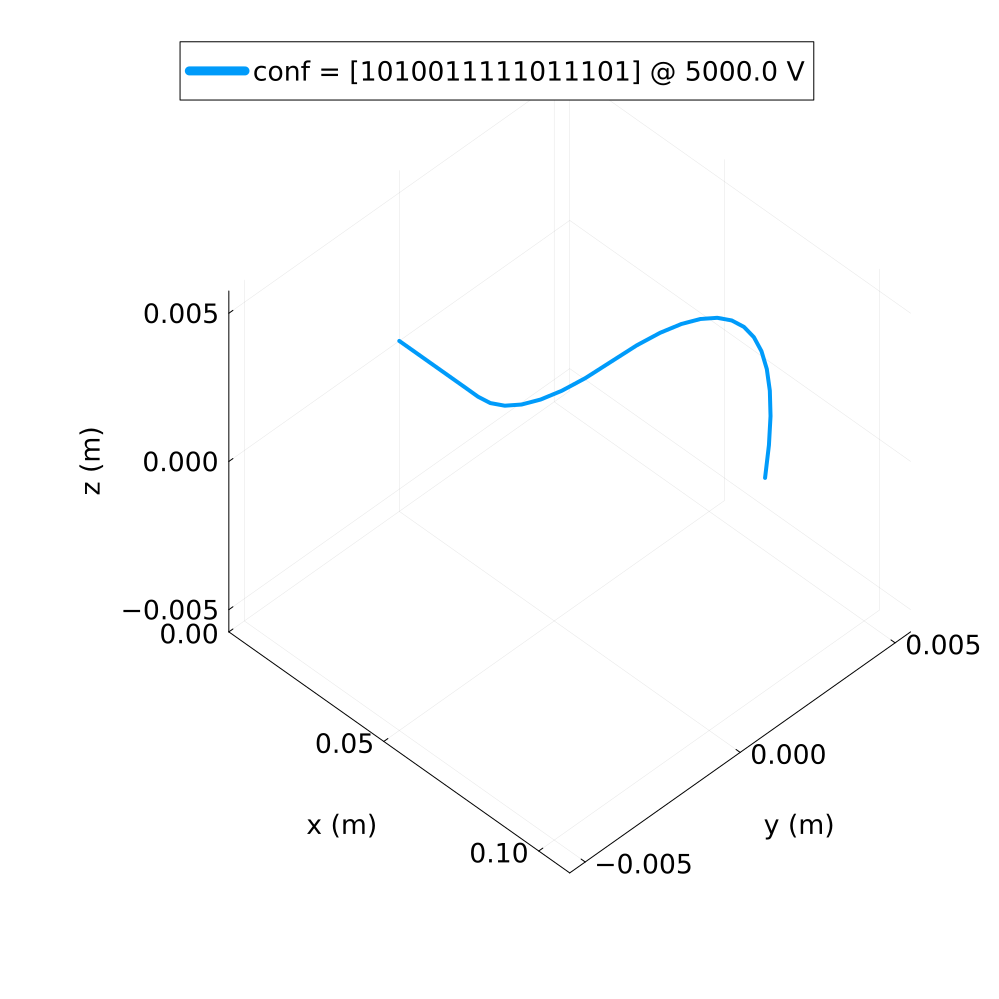

In [427]:
println(argmax(Err_))
x_i_ = X_test[:,argmax(Err_)]
n = length(x_i)
c_test_string = "["
for i in conf_list_test[:,argmax(Err_)]
    c_test_string = c_test_string * "$i"
end
c_test_string = c_test_string * "]"
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V",
legendfontsize=18,
guidefontsize=18,
tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-round(maximum(abs.(y_))+0.001,digits=3),0.0,round(maximum(abs.(y_))+0.001,digits=3)],
zticks = [-round(maximum(abs.(z_))+0.001,digits=3),0.0,round(maximum(abs.(z_))+0.001,digits=3)],
ylims = (-1.1*round(maximum(abs.(y_))+0.001,digits=3),1.1*round(maximum(abs.(y_))+0.001,digits=3)),
zlims = (-1.15*round(maximum(abs.(z_))+0.001,digits=3),1.15*round(maximum(abs.(z_))+0.001,digits=3)),
)

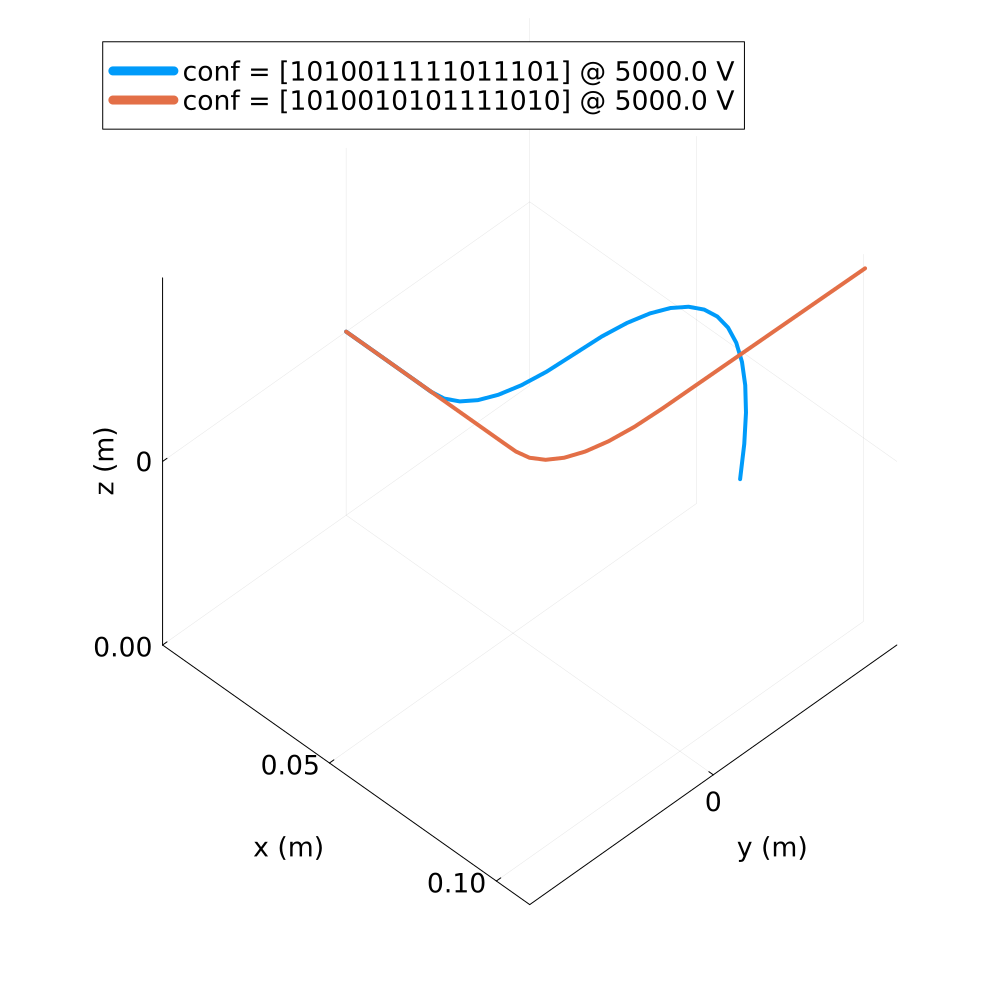

In [428]:
conf_test_L = Candidate_list[:,argmax(Err_)]
x_test_L  = ReadData_i(St,Sl,conf_test_L,pot)
x_i_ = x_test_L
c_test_string = "["
for i in conf_test_L
    c_test_string = c_test_string * "$i"
end
c_test_string = c_test_string * "]"
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot!(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V",
legendfontsize=18,
guidefontsize=18,
tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-round(maximum(abs.(y_))+0.001,digits=3),0.0,round(maximum(abs.(y_))+0.001,digits=3)],
zticks = [-round(maximum(abs.(z_))+0.001,digits=3),0.0,round(maximum(abs.(z_))+0.001,digits=3)],
# ylims = (-1.1*round(maximum(abs.(y_)),digits=3),1.1*round(maximum(abs.(y_)),digits=3)),
# zlims = (-1.15*round(maximum(abs.(z_)),digits=3),1.15*round(maximum(abs.(z_)),digits=3)),
)

In [429]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST4SL_5kV_Inverse_Error_max_$(argmax(Err)).svg")

"G:\\My Drive\\Temp\\Comunication\\ROM_Paper\\TB4ST4SL_5kV_Inverse_Error_max_16.svg"

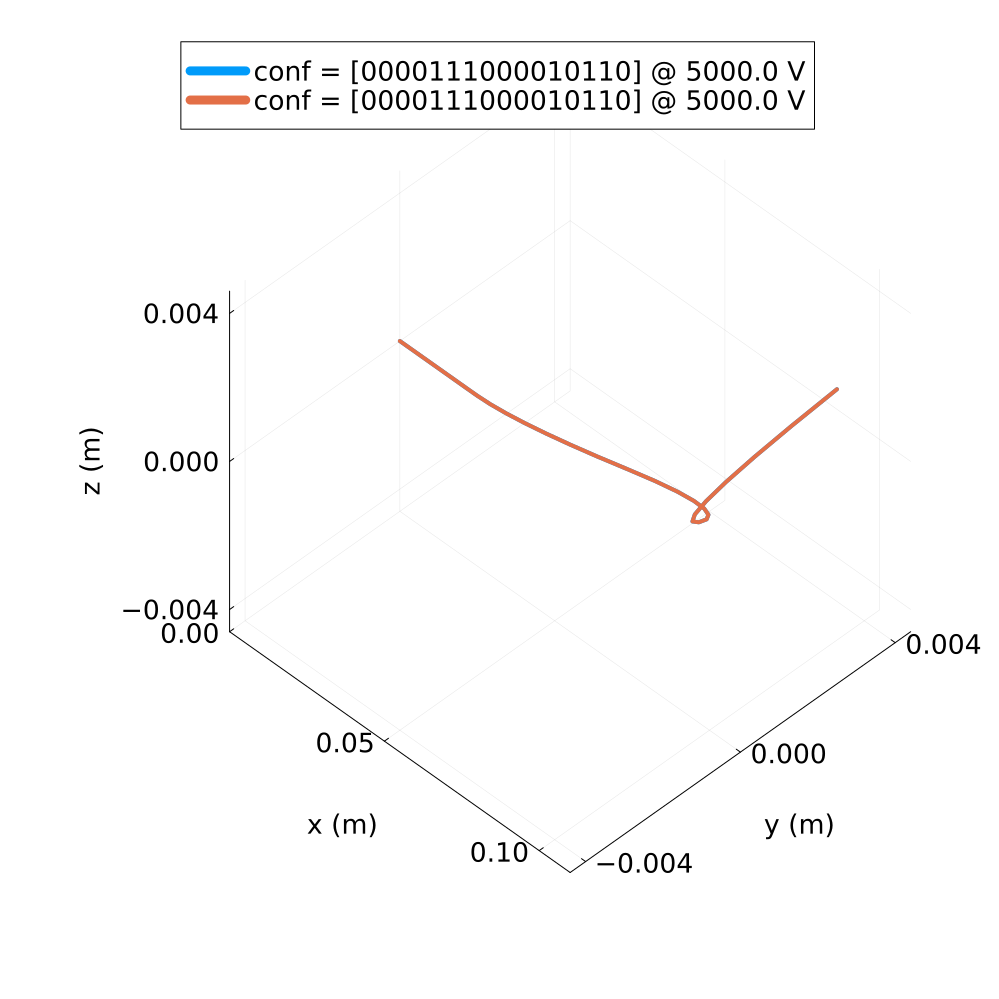

In [432]:
conf_test_L = Candidate_list[:,argmin(Err_)]
x_test_L  = ReadData_i(St,Sl,conf_test_L,pot)
x_i_ = x_test_L
c_test_string = "["
for i in conf_test_L
    c_test_string = c_test_string * "$i"
end
c_test_string = c_test_string * "]"
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot!(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V",
legendfontsize=18,
guidefontsize=18,
tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-round(maximum(abs.(y_))+0.001,digits=3),0.0,round(maximum(abs.(y_))+0.001,digits=3)],
zticks = [-round(maximum(abs.(z_))+0.001,digits=3),0.0,round(maximum(abs.(z_))+0.001,digits=3)],
ylims = (-1.1*round(maximum(abs.(y_))+0.001,digits=3),1.1*round(maximum(abs.(y_))+0.001,digits=3)),
zlims = (-1.15*round(maximum(abs.(z_))+0.001,digits=3),1.15*round(maximum(abs.(z_))+0.001,digits=3)),
)

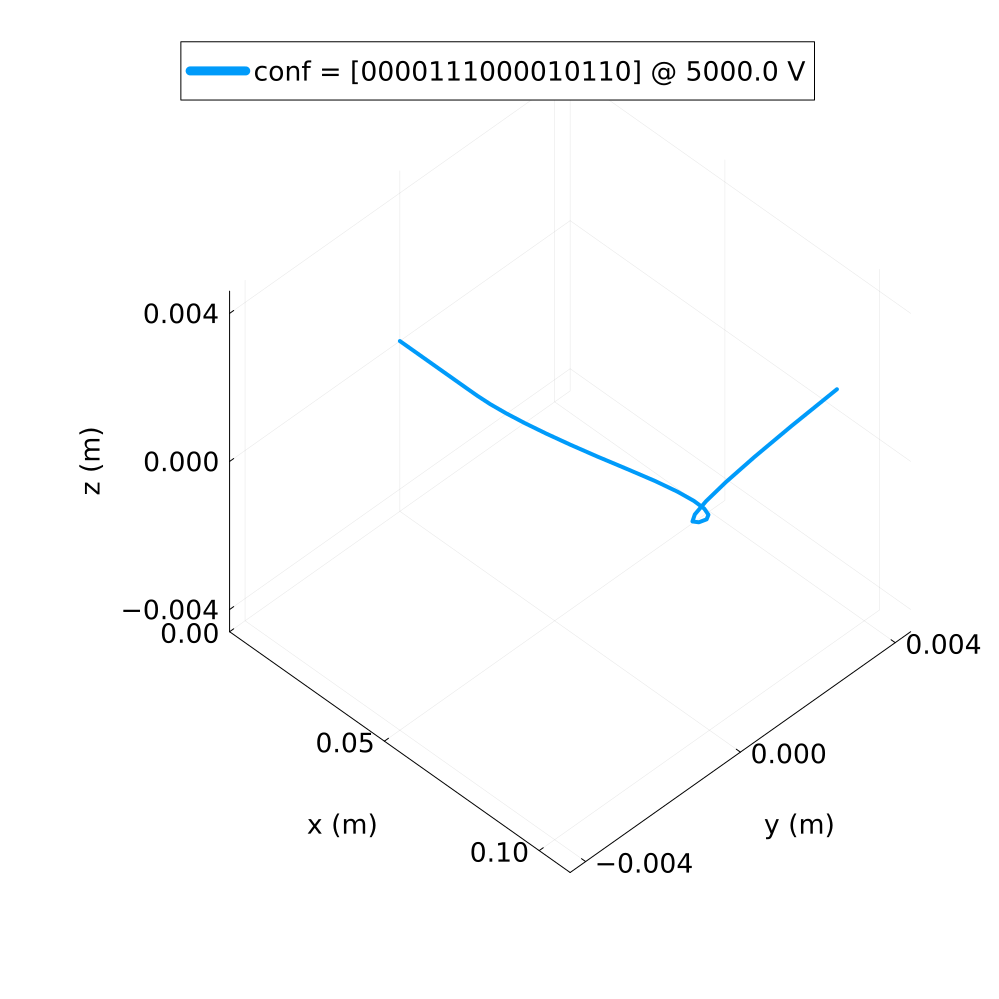

In [431]:
println(argmin(Err_))
x_i_ = X_test[:,argmin(Err_)]
n = length(x_i)
c_test_string = "["
for i in conf_list_test[:,argmin(Err_)]
    c_test_string = c_test_string * "$i"
end
c_test_string = c_test_string * "]"
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V",
legendfontsize=18,
guidefontsize=18,
tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-round(maximum(abs.(y_))+0.001,digits=3),0.0,round(maximum(abs.(y_))+0.001,digits=3)],
zticks = [-round(maximum(abs.(z_))+0.001,digits=3),0.0,round(maximum(abs.(z_))+0.001,digits=3)],
ylims = (-1.1*round(maximum(abs.(y_))+0.001,digits=3),1.1*round(maximum(abs.(y_))+0.001,digits=3)),
zlims = (-1.15*round(maximum(abs.(z_))+0.001,digits=3),1.15*round(maximum(abs.(z_))+0.001,digits=3)),
)

In [433]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST4SL_5kV_Inverse_Error_min_$(argmin(Err)).svg")

"G:\\My Drive\\Temp\\Comunication\\ROM_Paper\\TB4ST4SL_5kV_Inverse_Error_min_89.svg"

In [418]:
kdtree = KDTree(Y_Complete; leafsize = 10)
nh = 1
Candidate_list = []
for n_test in 1:30
    println("n_test = $n_test")
    x_test = X_test[:,n_test]
    c_test = conf_list_test[:,n_test]
    y_new = NewData2(x_test,Κ,neighbors,G,Z_,D_G_sym,Y_)
    idxs, dists = knn(kdtree, y_new, 100, true)
    conf_test_i = conf_complete[:,idxs[1]]
    Err = []
    for idx in idxs
        y_gen = VectorSearch(Y_,conf_complete[:,idx],VS_Conf_list)
        x_gen = ReverseMap2(y_gen,conf_complete[:,idx],Y_,X,conf_list,nh)
        # push!(Err,norm(x_gen[[Int(n/3)+1:n...]]-x_test[[Int(n/3)+1:n...]])/norm(x_test[[Int(n/3)+1:n...]]))
        push!(Err,norm(x_gen-x_test)/norm(x_test))
    end
    id = argmin(Err)
    conf_test_L = conf_complete[:,idxs[id]]
    println("Is the candidate correct: $(c_test == conf_test_L)")
    println("C_test : $c_test")
    println("Candidate configuration : $conf_test_L")
    println("Neighbor Number: $id")
    push!(Candidate_list,conf_test_L)
end
Candidate_list = reduce(hcat,Candidate_list)

16×30 Matrix{Int64}:
 1  0  1  0  0  1  0  1  0  1  1  1  0  …  1  0  0  0  0  0  1  1  0  0  1  0
 0  0  1  0  0  0  1  1  1  0  0  1  0     1  0  1  1  1  0  0  0  0  0  1  1
 0  0  1  1  0  1  1  1  1  1  0  1  1     0  0  1  1  1  1  1  0  1  1  1  1
 0  0  1  0  1  0  0  0  1  1  0  0  0     0  0  0  1  0  1  0  0  1  0  0  1
 1  1  1  1  0  0  0  0  1  0  0  1  1     1  0  1  1  0  1  1  0  1  0  1  1
 0  1  0  1  0  1  0  1  1  1  0  1  1  …  1  1  0  1  0  0  0  0  0  1  1  1
 1  1  1  1  0  0  0  1  1  1  1  0  1     0  0  1  0  0  1  1  0  1  1  0  0
 1  0  0  0  0  1  1  1  1  0  1  0  0     0  0  0  1  0  1  0  0  1  1  1  1
 0  0  1  1  1  0  1  0  1  0  0  0  0     1  0  1  1  1  1  0  1  0  0  0  0
 1  0  0  1  0  1  0  0  1  0  0  1  0     1  1  1  0  0  1  1  1  0  0  0  0
 0  0  1  0  0  0  1  1  1  1  1  0  1  …  1  1  1  0  1  0  0  0  0  0  1  0
 0  1  0  0  0  1  1  0  0  1  1  1  1     0  1  1  1  0  0  0  0  0  0  1  0
 0  0  1  0  0  0  1  0  1  0  0  1  0     

In [237]:
gr()

Plots.GRBackend()

In [243]:
x_

29-element Vector{Float64}:
 0.0
 0.003599583986843131
 0.00718590077609112
 0.010745338963844962
 0.014264497709940484
 0.017730143306336005
 0.02112926298867078
 0.024452739832170136
 0.027758451728326642
 0.031062503010684816
 ⋮
 0.06682685325866489
 0.06985773544234201
 0.07288861763985456
 0.07598670580079601
 0.07914434795796393
 0.08234962962403479
 0.08559050546484857
 0.08885479598850222
 0.09213024121505335

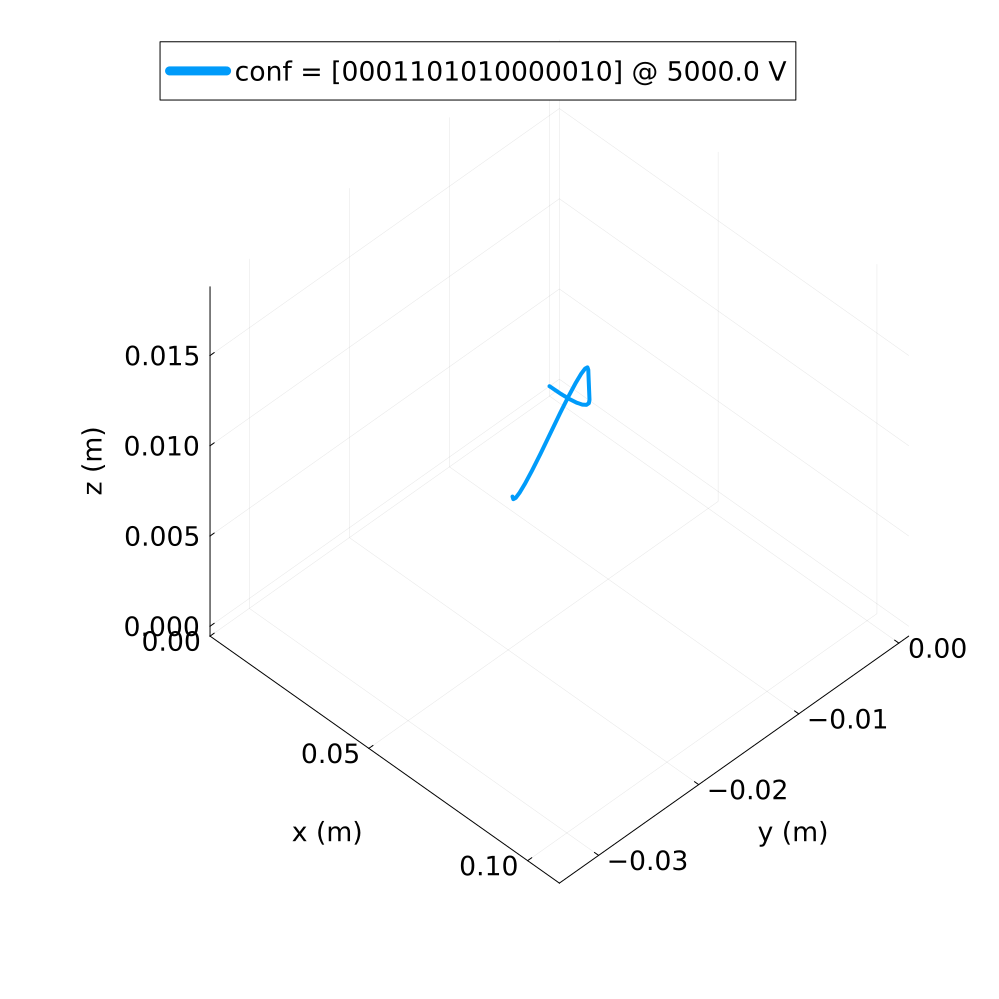

In [ ]:
# println(argmax(Err))
# x_i_ = X_test[:,argmax(Err)]
x_i_ = x_test
n = length(x_i_)
c_test_string = "["
for i in c_test
    c_test_string = c_test_string * "$i"
end
c_test_string = c_test_string * "]"
x_ = x_i_[[1:Int(n/3)...]]
y_ = x_i_[[Int(n/3)+1:Int(n/3)*2...]]
z_ = x_i_[[(Int(n/3)*2)+1:n...]]
plot(x_,y_,z_,
xlims =(0.0,0.11),
size=(1000,1000),
xlabel ="x (m)",
ylabel = "y (m)",
zlabel = "z (m)",
linewidth=4,
label="conf = $(c_test_string) @ $pot V",
legendfontsize=18,
guidefontsize=18,
tickfontsize=18,
legend=:topleft,
camera = (45, 45),
xticks = [0.0,0.05,0.1],
yticks = [-round(maximum(abs.(y_))+0.001,digits=3),0.0,round(maximum(abs.(y_))+0.001,digits=3)],
zticks = [-round(maximum(abs.(z_))+0.001,digits=3),0.0,round(maximum(abs.(z_))+0.001,digits=3)],
ylims = (-1.1*round(maximum(abs.(y_))+0.001,digits=3),1.1*round(maximum(abs.(y_))+0.001,digits=3)),
zlims = (-1.15*round(maximum(abs.(z_))+0.001,digits=3),1.15*round(maximum(abs.(z_))+0.001,digits=3)),
)

In [260]:
n_test = 5
x_test = X_test[:,n_test]
c_test = conf_list_test[:,n_test]
y_new = NewData2(x_test,Κ,neighbors,G,Z_,D_G_sym,Y_)

2-element Vector{Float64}:
 -0.0011710689551625477
 -0.00095944058368114

In [261]:
kdtree = KDTree(Y_Complete; leafsize = 10)
idx, dist = nn(kdtree, y_new)
conf_test_i = conf_complete[:,idx]

16-element Vector{Int64}:
 1
 0
 1
 1
 1
 0
 1
 1
 1
 0
 0
 1
 1
 0
 0
 1

In [262]:
y_gen = VectorSearch(Y_,conf_test_i,VS_Conf_list)
x_gen = ReverseMap2(y_gen,conf_test_i,Y_,X,conf_list,nh)
y_new_i = NewData2(x_gen,Κ,neighbors,G,Z_,D_G_sym,Y_)

2-element Vector{Float64}:
 -0.0009966345006663373
 -0.0008389073417438125

In [264]:
v_new = y_new_i - Y_Complete[:,idx]

2-element Vector{Float64}:
 0.00015277924797783078
 0.0001221338090665096

In [265]:
y_new = y_new+v_new

2-element Vector{Float64}:
 -0.001018289707184717
 -0.0008373067746146304

In [266]:
idx, dist = nn(kdtree, y_new)
conf_test_i = conf_complete[:,idx]

16-element Vector{Int64}:
 0
 0
 0
 1
 1
 1
 1
 0
 1
 0
 0
 1
 0
 1
 1
 0

In [415]:
plotlyjs()

Plots.PlotlyJSBackend()

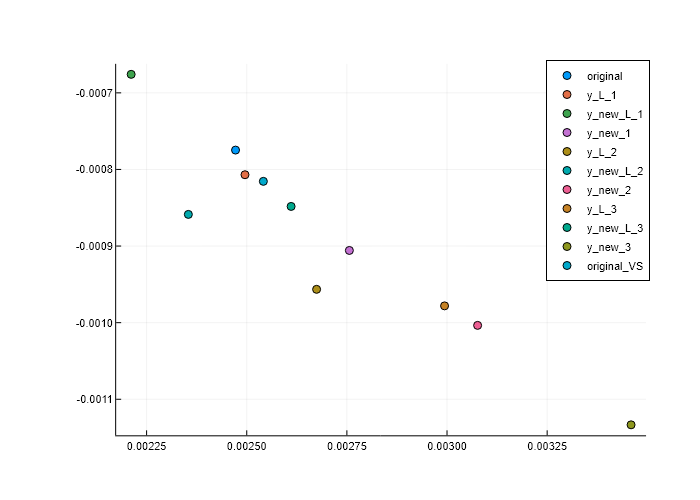

In [416]:
n_test = 19
x_test = X_test[:,n_test]
c_test = conf_list_test[:,n_test]
y_new = NewData2(x_test,Κ,neighbors,G,Z_,D_G_sym,Y_)
scatter(eachrow(y_new)...,label="original",hover = [1])
idx, dist = nn(kdtree, y_new)
conf_L = conf_complete[:,idx]
y_L = Y_Complete[:,idx]
p = scatter!(eachrow(y_L)...,label="y_L_1",hover = [1])
x_gen_L = ReverseMap2(y_L,conf_L,Y_,X,conf_list,nh)
y_new_L = NewData2(x_gen_L,Κ,neighbors,G,Z_,D_G_sym,Y_)
p = scatter!(eachrow(y_new_L)...,label="y_new_L_1",hover = [1])
y_new_k = y_new - (y_new_L-y_L)
p = scatter!(eachrow(y_new_k)...,label="y_new_1",hover = [1])
idx, dist = nn(kdtree, y_new_k)
conf_L_k = conf_complete[:,idx]
y_L_k = Y_Complete[:,idx]
count = 1
while norm(y_L-y_L_k)>1e-8 && count<100
    println(conf_L_k==c_test)
    y_new = y_new_k
    idx, dist = nn(kdtree, y_new)
    conf_L = conf_complete[:,idx]
    y_L = Y_Complete[:,idx]
    p = scatter!(eachrow(y_L)...,label="y_L_$(count+1)",hover = [count+1])
    x_gen_L = ReverseMap2(y_L,conf_L,Y_,X,conf_list,nh)
    y_new_L = NewData2(x_gen_L,Κ,neighbors,G,Z_,D_G_sym,Y_)
    p = scatter!(eachrow(y_new_L)...,label="y_new_L_$(count+1)",hover = [count+1])
    y_new_k = y_new - (y_new_L-y_L)
    p = scatter!(eachrow(y_new_k)...,label="y_new_$(count+1)",hover = [count+1])
    idx, dist = nn(kdtree, y_new_k)
    conf_L_k = conf_complete[:,idx]
    y_L_k = Y_Complete[:,idx]
    count += 1
    println(norm(y_L-y_L_k))
end
scatter!(eachrow(VectorSearch(Y_,c_test,VS_Conf_list))...,label="original_VS",hover = ["0"])

false
5.495589832501071e-5
false
0.00017063924303534564
false
2.416238443250634e-5
false
0.00011453663852096551
false
0.00014125668330105005
false
0.00011172180427505307
false
0.00015919205893358946
false
2.358970353406524e-5
false
7.88943247693759e-5
false
3.598623633453108e-5
false
6.379703763171278e-5
false
9.651169986507133e-5
false
4.9467584810333785e-5
false
0.0001532707190123492
false
4.732894700436387e-5
false
7.164788498911246e-5
false
5.7657936536669634e-5
false
0.00012391369636939828
false
9.190265047396244e-5
false
0.00012713248738234413
false
6.288733033083824e-5
false
0.00012902193666792058
false
8.392472646808635e-5
false
3.5692121690692946e-5
false
8.676418876438574e-5
false
0.00010664246875934377
false
4.954340323855587e-5
false
0.00013261001087562575
false
5.055110077426922e-5
false
0.00012769475327193794
false
4.936085482452234e-5
false
0.0001489508338309096
false
8.404592783476473e-5
false
6.948685391867848e-5
false
0.00010239182371518169
false
0.0001000156839987648

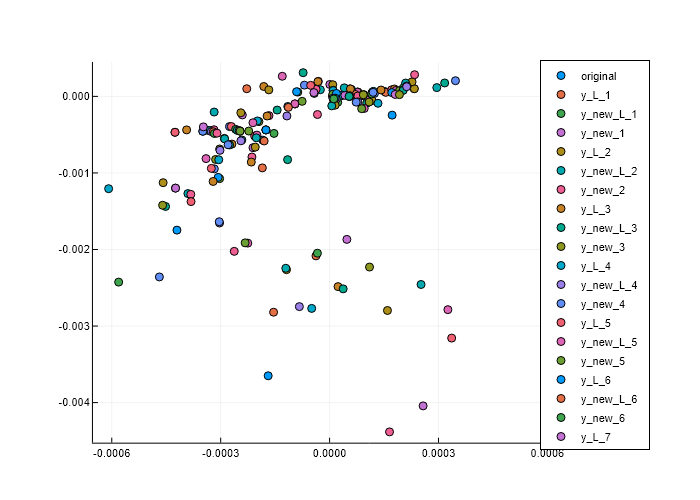

In [374]:
n_test = 2
x_test = X_test[:,n_test]
c_test = conf_list_test[:,n_test]
y_new = NewData(x_test,Κ,neighbors,G,Z_,D_G_sym)
scatter(eachrow(y_new)...,label="original",hover = [1])
idx, dist = nn(kdtree, y_new)
conf_L = conf_complete[:,idx]
y_L = Y_Complete[:,idx]
p = scatter!(eachrow(y_L)...,label="y_L_1",hover = [1])
x_gen_L = ReverseMap2(y_L,conf_L,Y_,X,conf_list,nh)
y_new_L = NewData(x_gen_L,Κ,neighbors,G,Z_,D_G_sym)
p = scatter!(eachrow(y_new_L)...,label="y_new_L_1",hover = [1])
y_new_k = y_new - (y_new_L-y_L)
p = scatter!(eachrow(y_new_k)...,label="y_new_1",hover = [1])
idx, dist = nn(kdtree, y_new_k)
conf_L_k = conf_complete[:,idx]
y_L_k = Y_Complete[:,idx]
count = 1
while norm(y_L-y_L_k)>1e-8 && count<100
    println(conf_L_k==c_test)
    y_L = y_L_k
    conf_L = conf_L_k
    y_new = y_new_k
    p = scatter!(eachrow(y_L)...,label="y_L_$(count+1)",hover = [count+1])
    x_gen_L = ReverseMap2(y_L,conf_L,Y_,X,conf_list,nh)
    y_new_L = NewData(x_gen_L,Κ,neighbors,G,Z_,D_G_sym)
    p = scatter!(eachrow(y_new_L)...,label="y_new_L_$(count+1)",hover = [count+1])
    y_new_k = y_new - (y_new_L-y_L)
    p = scatter!(eachrow(y_new_k)...,label="y_new_$(count+1)",hover = [count+1],size=(800,800))
    idx, dist = nn(kdtree, y_new_k)
    conf_L_k = conf_complete[:,idx]
    y_L_k = Y_Complete[:,idx]
    count += 1
    println(norm(y_L-y_L_k))
end
scatter!(eachrow(VectorSearch(Y_,c_test,VS_Conf_list))...,label="original_VS",hover = ["0"])

In [375]:
println(conf_L_k)
println(conf_L)
println(c_test)

[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
